# Figure 3

In [1]:
%load_ext autoreload
%autoreload 2

from flyvis import EnsembleView

In [2]:
ensemble = EnsembleView("flow/0001", best_checkpoint_fn_kwargs = {
    "validation_subdir": "validation",
    "loss_file_name": "loss",
})

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2025-07-02 17:25:10] ensemble:166 Loaded 50 networks.


## a

In [3]:
task_error = ensemble.task_error()

In [4]:
embedding_and_clustering = ensemble.clustering("T4c")

/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator GaussianMixture from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[2025-07-02 17:25:11] clustering:835 Loaded T4c embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen

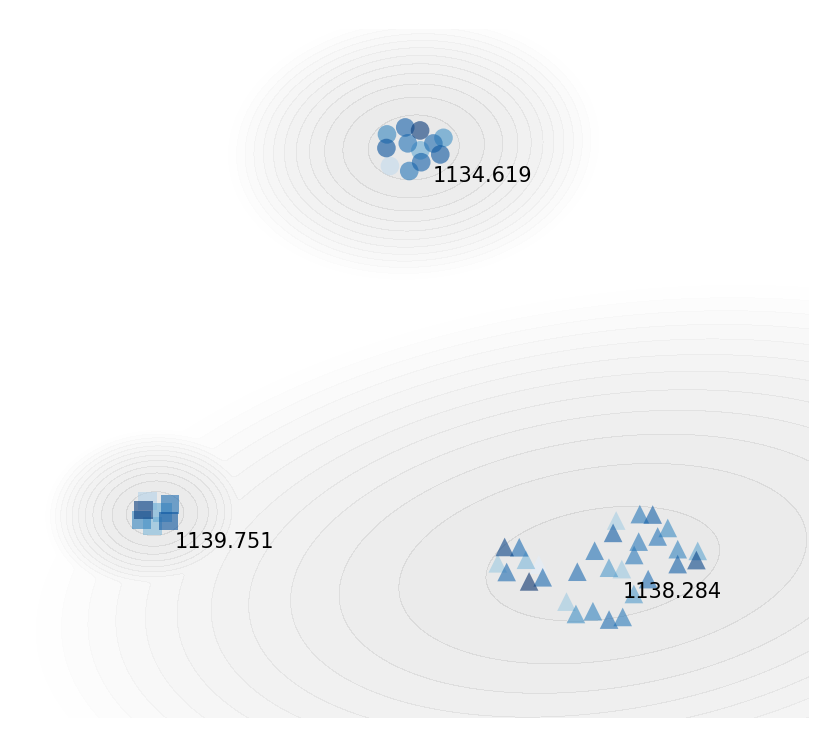

In [5]:
embeddingplot = embedding_and_clustering.plot(
    task_error=task_error.values, colors=task_error.colors
)

## b

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from flyvis.analysis.visualization import plt_utils
from flyvis.analysis.moving_bar_responses import plot_angular_tuning

In [7]:
cluster_indices = ensemble.cluster_indices("T4c")

In [8]:
r = ensemble.moving_edge_responses()
r['responses'] /= np.abs(r['responses']).max(dim=('frame', 'sample'))

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/4c45b2ac094e4af1c0077b6b2dd229d9/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/a43945c7e146b0dc764e01934c849aae/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c1358a987f84305e5aafe3011f07b25c/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/de0500d01d343e3e83419c61da23790a/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/69c49d417efb16e9b2f695fc81ed51cb/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/005/__cache__/flyvis/analysis/stimulus_responses

/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/joblib/memory.py:914: CacheWarning: Unable to load Dataset from h5. Exception: cannot reshape array of size 0 into shape (144,1078,1,721).
  return self.store_backend.load_item(
[2025-07-02 17:25:19] logger:80 [MemorizedFunc(func=<function compute_responses at 0x1553f359d260>, location=/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/038/__cache__)]: Exception while loading results for compute_responses(CheckpointedNetwork(
    network_class=Network,
    name='flow/0001/038',
    config={   'connectome': {   'extent': 15,
                      'file': 'fib25-fib19_v2.2.json',
                      'n_syn_fill': 1,
                      'type': 'ConnectomeFromAvgFilters'},
    'dynamics': {'activation': {'type': 'relu'}, 'type': 'PPNeuronIGRSynapses'},
    'edge_config': {   'sign': {   'form': 'value',
                                   'groupby': ['source_type', 'target_type'],
   

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/037/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ebffceaea287ef585be01ba7a8f34dee/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/038/__cache__/flyvis/analysis/stimulus_responses/compute_responses/cf89774820d088a4e9c5fd015e083022/output.h5


[2025-07-02 17:25:24] network:222 Initialized network with NumberOfParams(free=734, fixed=2954) parameters.
[2025-07-02 17:25:24] chkpt_utils:36 Recovered network state.
[2025-07-02 17:25:24] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:25:58] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/038/__cache__/flyvis/analysis/stimulus_responses/compute_responses/cf89774820d088a4e9c5fd015e083022/output.h5
[2025-07-02 17:25:59] chkpt_utils:36 Recovered network state.
[2025-07-02 17:25:59] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:26:32] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/039/__cache__/flyvis/analysis/stimulus_responses/compute_responses/161c0e97f431a8c46660f4756c209cb0/output.h5
[2025-07-02 17:26:33] chkpt_utils:36 Recovered network state.
[2025-07-02 17:26:33] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:27:06] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/040/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2cc5372db1230f8285a618eef045e1d6/output.h5
[2025-07-02 17:27:07] chkpt_utils:36 Recovered network state.
[2025-07-02 17:27:07] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:27:40] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/041/__cache__/flyvis/analysis/stimulus_responses/compute_responses/9d59222c9848599ff74b96141877e640/output.h5
[2025-07-02 17:27:41] chkpt_utils:36 Recovered network state.
[2025-07-02 17:27:41] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:28:14] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/042/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5266165bf35c72f36792edfe512fb104/output.h5
[2025-07-02 17:28:15] chkpt_utils:36 Recovered network state.
[2025-07-02 17:28:16] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:28:49] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/043/__cache__/flyvis/analysis/stimulus_responses/compute_responses/4623dc9b9a8ce8f62564d05d3dcbe16a/output.h5
[2025-07-02 17:28:50] chkpt_utils:36 Recovered network state.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/044/__cache__/flyvis/analysis/stimulus_responses/compute_responses/415a53de592713dd6550b01407795a68/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/045/__cache__/flyvis/analysis/stimulus_responses/compute_responses/71b32a36c5e75fa37fcdffe2e89f1046/output.h5


[2025-07-02 17:28:50] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:29:24] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/046/__cache__/flyvis/analysis/stimulus_responses/compute_responses/916e7f0ef36672926de5fa515b4f12ad/output.h5
[2025-07-02 17:29:25] chkpt_utils:36 Recovered network state.
[2025-07-02 17:29:25] network:757 Computing 144 stimulus responses.


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:29:58] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/047/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7b7d5824445957fedec905576f29b352/output.h5
[2025-07-02 17:29:59] chkpt_utils:36 Recovered network state.
[2025-07-02 17:29:59] network:757 Computing 144 stimulus responses.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/048/__cache__/flyvis/analysis/stimulus_responses/compute_responses/b17d032cd0553c0b280498859be81fa2/output.h5


Batch:   0%|          | 0/36 [00:00<?, ?it/s]

[2025-07-02 17:30:32] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/049/__cache__/flyvis/analysis/stimulus_responses/compute_responses/723a52b87bcb2d81b061cfe795f3c513/output.h5


In [9]:
cluster_indices = ensemble.cluster_indices("T4c")

In [10]:
colors = ensemble.task_error().colors

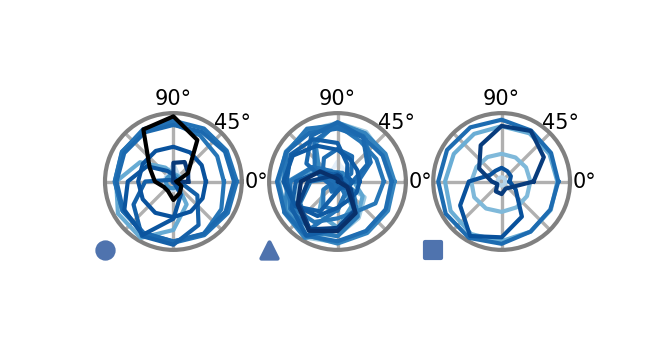

In [11]:
fig, axes = plt.subplots(
    1, len(cluster_indices), subplot_kw={"projection": "polar"}, figsize=[2, 1]
)
for cluster_id, indices in cluster_indices.items():
    plot_angular_tuning(
        r.sel(network_id=indices),
        "T4c",
        intensity=1,
        colors=colors[indices],
        zorder=ensemble.zorder()[indices],
        groundtruth=True if cluster_id == 0 else False,
        fig=fig,
        ax=axes[cluster_id],
    )
    plt_utils.add_cluster_marker(
        fig, axes[cluster_id], marker=plt_utils.get_marker(cluster_id)
    )

## e

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/008/__cache__/flyvis/analysis/stimulus_responses/compute_responses/513e56d3dccca24ae7af29dad91edfb7/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/010/__cache__/flyvis/analysis/stimulus_responses/compute_responses/26f6a8b863fc5a730d526786c899abf9/output.h5


[2025-07-02 17:30:47] network:222 Initialized network with NumberOfParams(free=734, fixed=2954) parameters.
[2025-07-02 17:30:47] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:47] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:48] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/015/__cache__/flyvis/analysis/stimulus_responses/compute_responses/950dad0717a2f3c1f8a40680011a21d4/output.h5
[2025-07-02 17:30:48] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:48] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:48] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/025/__cache__/flyvis/analysis/stimulus_responses/compute_responses/10239dd15e5b948c79bee56abc6977e2/output.h5
[2025-07-02 17:30:49] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:49] network:757 Computing 4 stimulus responses.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/028/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7dc9fd871a46f73d4bb5cb3043022949/output.h5


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:49] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/032/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c228a9d561eee2a43017ee5aedcef47e/output.h5
[2025-07-02 17:30:49] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:49] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:50] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/034/__cache__/flyvis/analysis/stimulus_responses/compute_responses/41e1514ccdf09f7828ff0de8cb08db2e/output.h5
[2025-07-02 17:30:50] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:50] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:51] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/039/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f32ac6f1af96c124e413c31fd50f506f/output.h5
[2025-07-02 17:30:51] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:51] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:51] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/041/__cache__/flyvis/analysis/stimulus_responses/compute_responses/04c5d69ad222b9629d66a437f1ac8a50/output.h5
[2025-07-02 17:30:52] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:52] network:757 Computing 4 stimulus responses.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/045/__cache__/flyvis/analysis/stimulus_responses/compute_responses/aed1139f3d18a555f91ffff4d4a3c031/output.h5


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:52] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/046/__cache__/flyvis/analysis/stimulus_responses/compute_responses/02bb4825609e6ae63139fc69f07df2f3/output.h5
[2025-07-02 17:30:52] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:52] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:53] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/049/__cache__/flyvis/analysis/stimulus_responses/compute_responses/426f17d7b8235592b43aaf33081e8553/output.h5


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/184709cc805cee45fe09a60db800f74b/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3abb4937221b852fabc38c1e700bf234/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/beca8d6cdffeaa92bf121f788b7407a9/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/124c99c3cae43a602b33177b62fcaf7a/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/006/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5c758f1ec62629ac7512211ba6ad016c/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/007/__cache__/flyvis/analysis/stimulus_responses

[2025-07-02 17:30:58] network:222 Initialized network with NumberOfParams(free=734, fixed=2954) parameters.
[2025-07-02 17:30:58] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:58] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:30:59] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/012/__cache__/flyvis/analysis/stimulus_responses/compute_responses/531c7d12f20195a888fdd3cd1454ec17/output.h5
[2025-07-02 17:30:59] chkpt_utils:36 Recovered network state.
[2025-07-02 17:30:59] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:00] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/013/__cache__/flyvis/analysis/stimulus_responses/compute_responses/817567a9bac9c708f61330ad755fa3cc/output.h5
[2025-07-02 17:31:00] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:00] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:00] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/014/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5ced932514a80bb6fa68eccc8b95e350/output.h5
[2025-07-02 17:31:01] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:01] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:01] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/016/__cache__/flyvis/analysis/stimulus_responses/compute_responses/fa2338ebb200a8edcb9328e1bf7c2c2e/output.h5
[2025-07-02 17:31:01] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:01] network:757 Computing 4 stimulus responses.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/017/__cache__/flyvis/analysis/stimulus_responses/compute_responses/353d1494238fd2f03a8bb2549c597d36/output.h5


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:02] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/018/__cache__/flyvis/analysis/stimulus_responses/compute_responses/0c26f7dfe284a33b918c5df46c4c1d48/output.h5
[2025-07-02 17:31:02] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:02] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:03] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/019/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e0e5074a33b6aaa417377dc95ecc06fb/output.h5
[2025-07-02 17:31:03] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:03] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:03] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/020/__cache__/flyvis/analysis/stimulus_responses/compute_responses/b9dfdbb2d0876b87317d9eac82b19bb7/output.h5
[2025-07-02 17:31:04] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:04] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:04] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/021/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2aae0a53bc7c144bde0382c864ba02dc/output.h5
[2025-07-02 17:31:05] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:05] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:05] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/022/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f46b4e4faadffb44db3d23c984a58441/output.h5
[2025-07-02 17:31:05] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:05] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:06] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/023/__cache__/flyvis/analysis/stimulus_responses/compute_responses/34d7389be7d0307e46d3be2031466958/output.h5
[2025-07-02 17:31:06] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:06] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:07] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/024/__cache__/flyvis/analysis/stimulus_responses/compute_responses/af19265562226e5a9e4e4404f344ce40/output.h5
[2025-07-02 17:31:07] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:07] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:07] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/027/__cache__/flyvis/analysis/stimulus_responses/compute_responses/d10ca5916d8ff712b736ede1973a06eb/output.h5


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/029/__cache__/flyvis/analysis/stimulus_responses/compute_responses/35ae0f8d5e0042faa55acc2835f8124c/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/030/__cache__/flyvis/analysis/stimulus_responses/compute_responses/548cf1048c15ff473e2364a6d5dd62d0/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/031/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ec58fe1b159007a8363a634d074e04c3/output.h5


[2025-07-02 17:31:08] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:08] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:08] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/035/__cache__/flyvis/analysis/stimulus_responses/compute_responses/cb70bfaee75a7afbb7b4889ae1f700e0/output.h5
[2025-07-02 17:31:09] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:09] network:757 Computing 4 stimulus responses.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/036/__cache__/flyvis/analysis/stimulus_responses/compute_responses/4690adfd05ca5f1244bee54a4077b4fc/output.h5


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:09] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/037/__cache__/flyvis/analysis/stimulus_responses/compute_responses/a14d1c1b7e36c291f54a60d861c6c9c6/output.h5
[2025-07-02 17:31:09] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:09] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:10] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/042/__cache__/flyvis/analysis/stimulus_responses/compute_responses/1a2fa7e2f4795929486f870849b6e766/output.h5
[2025-07-02 17:31:10] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:10] network:757 Computing 4 stimulus responses.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/044/__cache__/flyvis/analysis/stimulus_responses/compute_responses/a3d0a6ed8b1a38dd714c83701ed75c65/output.h5


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:11] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/047/__cache__/flyvis/analysis/stimulus_responses/compute_responses/4f6b2136702bbf5eed1910338bdcc755/output.h5


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/048/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c01d05e63f4f3996fb701da404172404/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/4429f8ee198b64fa8cdec83a1379c678/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/005/__cache__/flyvis/analysis/stimulus_responses/compute_responses/328b2f1a22ebe3f4408ea06b6a46be3f/output.h5


[2025-07-02 17:31:16] network:222 Initialized network with NumberOfParams(free=734, fixed=2954) parameters.
[2025-07-02 17:31:16] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:16] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:16] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/026/__cache__/flyvis/analysis/stimulus_responses/compute_responses/93e5101bda72610d8cffc1c126b68297/output.h5
[2025-07-02 17:31:16] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:16] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:17] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/033/__cache__/flyvis/analysis/stimulus_responses/compute_responses/d1c932d262a85700590955b4c15b8223/output.h5
[2025-07-02 17:31:17] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:17] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:18] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/038/__cache__/flyvis/analysis/stimulus_responses/compute_responses/06f23b94569dd7f7a0a7a9c85270dc28/output.h5
[2025-07-02 17:31:18] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:18] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:18] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/040/__cache__/flyvis/analysis/stimulus_responses/compute_responses/67ca2f3dcda7b38ed06724b93884ebdd/output.h5
[2025-07-02 17:31:19] chkpt_utils:36 Recovered network state.
[2025-07-02 17:31:19] network:757 Computing 4 stimulus responses.


Batch:   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-02 17:31:19] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0001/043/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3c5881583d6c19b113378b79c7af6ec0/output.h5


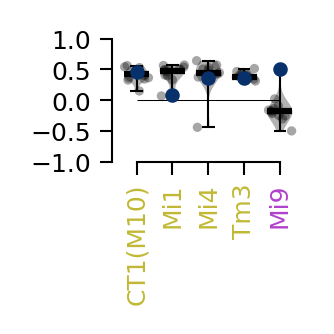

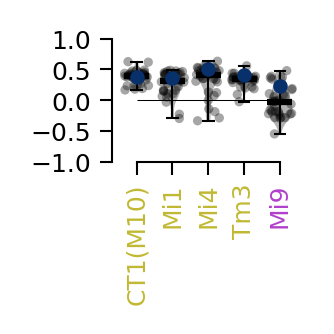

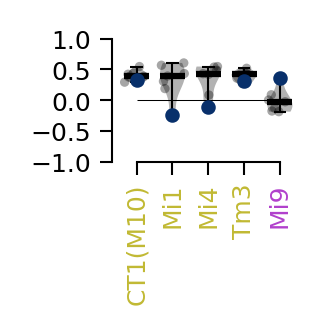

In [12]:
for cluster_id, indices in cluster_indices.items():
    with ensemble.select_items(indices):
        fig, ax = ensemble.flash_response_index(
            cell_types=["Mi1", "Tm3", "Mi4", "Mi9", "CT1(M10)"], figsize=[1, 1]
        )